In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PART I: DATA PREPROCESSING

In [35]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/Computer Vision_IKT213/Project/crack_dataset/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 13664 images belonging to 2 classes.


In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/Computer Vision_IKT213/Project/crack_dataset/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 5546 images belonging to 2 classes.


In [37]:
training_set[2]

(array([[[[0.7129087 , 0.65408516, 0.5717322 ],
          [0.71292514, 0.6541016 , 0.5717487 ],
          [0.7129415 , 0.654118  , 0.57176507],
          ...,
          [0.7846845 , 0.72586095, 0.643508  ],
          [0.7847173 , 0.7258938 , 0.64354086],
          [0.78475016, 0.72592664, 0.6435737 ]],
 
         [[0.7100952 , 0.65127164, 0.5689187 ],
          [0.71008533, 0.6512618 , 0.5689089 ],
          [0.71007544, 0.6512519 , 0.568899  ],
          ...,
          [0.73508424, 0.6762607 , 0.5939078 ],
          [0.7350153 , 0.67619175, 0.59383875],
          [0.73494625, 0.6761227 , 0.5937698 ]],
 
         [[0.7058824 , 0.64705884, 0.5647059 ],
          [0.7058824 , 0.64705884, 0.5647059 ],
          [0.7058824 , 0.64705884, 0.5647059 ],
          ...,
          [0.68266994, 0.6238464 , 0.5414935 ],
          [0.68263054, 0.62380695, 0.541454  ],
          [0.6825911 , 0.62376755, 0.5414146 ]],
 
         ...,
 
         [[0.66299003, 0.5924018 , 0.49828416],
          [0.66297

# PART II: BUILDING CNN:

Step 1: Choosing Model Type

In [38]:
cnn = Sequential() #Choosing sequential model.

Step 2: Adding The First Convolution Layer

In [39]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu",input_shape=[64,64,3])) #Adding convolution layer

Step 3: Adding Pooling Layer:

Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. It is used to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features

In [40]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

Step 4: Adding The Second Convolution Layer

In [41]:
cnn.add(Conv2D(filters= 32, kernel_size=3, activation= "relu"))

Step 5: Adding the Second Pooling Layer

In [42]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

Step 6: Adding Flatten Layer:

In [43]:
cnn.add(Flatten())

Step 7: Adding Artificial Neural Networks Layer for Full Connection

In [44]:
cnn.add(Dense(units=128,activation="relu"))

In [45]:
cnn.add(Dense(units=256,activation="relu"))

In [46]:
cnn.add(Dense(units=1,activation="sigmoid"))

Step 8: Compiling the CNN

In [47]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [48]:
cnn.summary() #This is the summary of our model 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [49]:
history= cnn.fit(x=training_set,validation_data=test_set,epochs=14)

Epoch 1/14
427/427 [==============================] - 96s 225ms/step - loss: 0.4431 - accuracy: 0.8219 - val_loss: 0.6019 - val_accuracy: 0.7250
Epoch 2/14
427/427 [==============================] - 83s 193ms/step - loss: 0.3788 - accuracy: 0.8566 - val_loss: 0.3292 - val_accuracy: 0.9261
Epoch 3/14
427/427 [==============================] - 92s 216ms/step - loss: 0.3472 - accuracy: 0.8688 - val_loss: 0.3909 - val_accuracy: 0.8805
Epoch 4/14
427/427 [==============================] - 90s 211ms/step - loss: 0.3347 - accuracy: 0.8732 - val_loss: 0.3922 - val_accuracy: 0.8273
Epoch 5/14
427/427 [==============================] - 89s 209ms/step - loss: 0.3235 - accuracy: 0.8797 - val_loss: 0.2100 - val_accuracy: 0.9396
Epoch 6/14
427/427 [==============================] - 89s 208ms/step - loss: 0.3140 - accuracy: 0.8822 - val_loss: 0.2110 - val_accuracy: 0.9365
Epoch 7/14
427/427 [==============================] - 74s 173ms/step - loss: 0.3081 - accuracy: 0.8854 - val_loss: 0.2121 - val_ac

PART III: EVALUATION OF THE MODEL and MAKING PREDICTIIONS

In [50]:
pd.DataFrame(cnn.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.443124,0.821941,0.601915,0.725027
1,0.378845,0.856631,0.329248,0.926073
2,0.347221,0.868779,0.390889,0.880454
3,0.334701,0.873244,0.392205,0.827263
4,0.323546,0.879684,0.210015,0.939596
5,0.313974,0.882245,0.211030,0.936531
6,0.308065,0.885392,0.212121,0.929859
7,0.307987,0.885319,0.362405,0.847999
8,0.300075,0.887807,0.346311,0.854129
9,0.294276,0.891686,0.253341,0.913631


<AxesSubplot:>

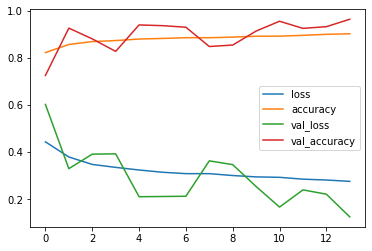

In [51]:
pd.DataFrame(cnn.history.history).plot()

In [52]:
from tensorflow.keras.preprocessing import image

In [53]:
def predictor(location):
    test_image=image.load_img(location,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        
        prediction = "There is no crack"
    else:
        prediction = "There is a crack"
    print(result[0][0])
    return prediction

In [54]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/Computer Vision_IKT213/Project/crack_dataset/test/cracked/070-234.jpg"
predictor(location)

0.0


'There is a crack'

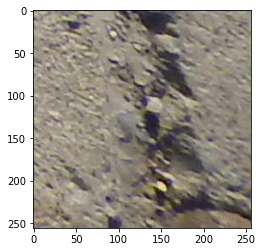

In [56]:
plt.imshow(plt.imread("C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/Computer Vision_IKT213/Project/crack_dataset/test/cracked/070-234.jpg"))

In [55]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/Computer Vision_IKT213/Project/crack_dataset/test/non_cracked/096-145.jpg"
predictor(location)

1.0


'There is no crack'

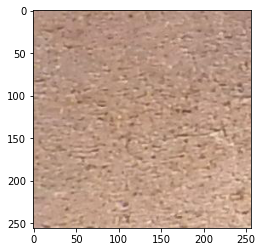

In [57]:
plt.imshow(plt.imread("C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/Computer Vision_IKT213/Project/crack_dataset/test/non_cracked/096-145.jpg"))

# PART IV: SAVING THE MODEL

In [64]:
# save model and architecture to single file
cnn.save("model.h5")
print("Saved model to disk")

Saved model to disk


Reload Saved Model and Make a Prediction:

In [67]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [68]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/Computer Vision_IKT213/Project/crack_dataset/test/non_cracked/001-34.jpg"


In [69]:
def predictor2(location):
    test_image=image.load_img(location,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        
        prediction = "There is no crack"
    else:
        prediction = "There is a crack"
    print(result[0][0])
    return prediction

In [70]:
predictor2(location)

1.0


'There is no crack'

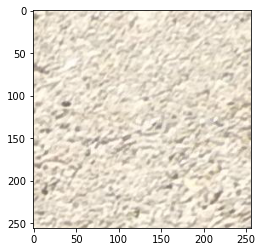

In [72]:
plt.imshow(plt.imread(location))